using SKLearn

In [152]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
from scipy.stats import norm

In [153]:
x = np.linspace(10,100,100)

In [154]:
y = 3*x+4+np.random.normal(10,50,size=len(x))# it is the equation of the output
#y = 3*x+4+(some random normal noise)

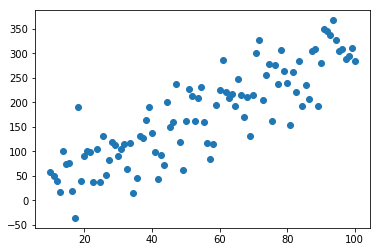

In [155]:
plt.scatter(x,y)

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
model = LinearRegression(fit_intercept = True)

In [158]:
x.shape
#array of 100 elements

(100,)

In [159]:
xfit = model.fit(x[:,np.newaxis],y)# fitting the model

In [160]:
xnew = np.linspace(1,100,1000)

In [161]:
ynew = model.predict(xnew[:,np.newaxis])

In [162]:
ynew.shape

(1000,)

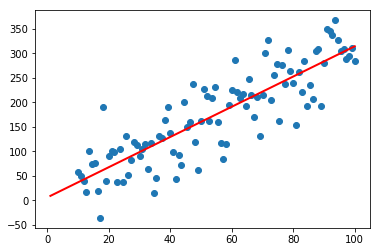

In [163]:
plt.scatter(x,y)
plt.plot(xnew,ynew,'r',linewidth =2)

Plotting regression Residuals using histogram.

Residual - It is the distance between the regression line 
            and a data point.(error)

In [165]:
plt.hist(ynew-y,bins = 10,density = True,alpha=0.6,color='b')


ValueError: operands could not be broadcast together with shapes (1000,) (100,) 

Creating synthetic data sklearn.datasets.samples_generator class Linear Regression

In [ ]:
from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split

Generate the Data

In [ ]:
X,y,coeff = make_regression(n_samples=100, n_features=1, n_informative=10,
                           n_targets=1,bias=100.0,effective_rank=None,tail_strength=0.5,
                           noise=10.0,shuffle=True,coef=True,random_state=None)

In [ ]:
X.shape,y.shape,coeff

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(X,y,'ro')
plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
mod = LinearRegression()

In [ ]:
newmodel = mod.fit(X,y)

In [ ]:
newmodel.intercept_

In [ ]:
newmodel.coef_

In [ ]:
newmodel.rank_

In [ ]:
ypred = newmodel.intercept_ + newmodel.coef_[0]*X

In [ ]:
plt.plot(X,y,'ro')
plt.plot(X,ypred)
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=1)

In [ ]:
model1 = mod.fit(X_train,y_train)

Cross Validation

In [166]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [167]:
scores = cross_val_score(model1,X_train,y_train,cv=5)

In [168]:
scores

array([0.88389668, 0.86195891, 0.95272742, 0.95961016, 0.87737696])

In [169]:
scores.mean(), scores.std()
#a good model

(0.9071140263763613, 0.040740027571909)

In [170]:
y_pred = model1.predict(X_test)

In [171]:
y_pred.shape

(40,)

In [172]:
mean_squared_error(y_test,y_pred.flatten())
#least mean_squared_error means a good model

71.15081712110057

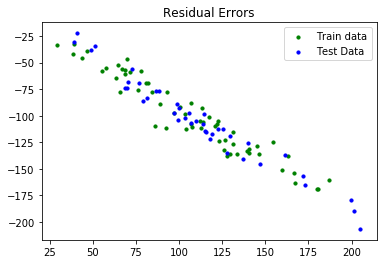

In [173]:
plt.scatter(model1.predict(X_train),model.predict(X_train)-y_train,color='g',s=10,label='Train data')
plt.scatter(model1.predict(X_test),model.predict(X_test)-y_test,color='b',s=10,label='Test Data')
plt.title('Residual Errors')
plt.legend(loc='upper right')

In [174]:
np.transpose(X)

array([[ 1.08542511,  0.82351389, -0.66701643, -0.20146812, -0.51596914,
         0.46685689,  1.27953667,  1.85318832, -1.99641059, -0.55135066,
         1.70497921,  0.87134098, -1.19636201, -0.89562621,  0.56631972,
        -0.67832678, -0.31742813, -0.01526583,  1.1294844 ,  0.38325935,
         0.73042178, -0.81321127,  2.42760297,  0.62644368, -0.89131633,
         1.5156059 ,  1.24682677,  2.92614357,  2.2480164 , -1.01181528,
         0.61532272,  0.42314916,  0.48684207, -0.34386255, -0.38845806,
        -0.08931421, -0.85837951,  0.72566297, -0.02728829,  1.310173  ,
         2.03445936, -1.51455282,  0.17407757,  0.18517291,  0.18147087,
        -0.63729865,  1.11594753, -1.73078308, -0.60261749, -0.85115952,
        -1.72685117,  0.70011728,  1.03364751,  0.01102414,  0.1465359 ,
         0.76138809, -1.37303209,  1.86816744,  0.32624569,  1.99623949,
         1.65884615, -1.04267713,  0.27035714,  0.92948881, -0.0865693 ,
        -0.84751557,  0.63835494,  0.7645768 ,  0.1

In [175]:
np.dot(np.transpose(X),y)

array([1697.85448018])

Normal equation

In [176]:
x.shape

(100,)

In [177]:
y.shape

(100,)

In [178]:
x_bias=np.ones((100,1))
x_ = np.reshape(x,(100,1))
x_ = np.append(x_bias,x_,axis=1)

In [179]:
x_transpose = np.transpose(x_)
x_transpose_dot_x = x_transpose.dot(x_)

In [181]:
test1 = np.linalg.inv(x_transpose_dot_x)

In [182]:
test2 =x_transpose.dot(y)

In [183]:
thetas = test1.dot(test2)

In [184]:
thetas

array([5.94901226, 3.08285959])

In [185]:
xfit1 = np.linspace(0,100,1000)
yfit1 = thetas[0]+xfit1*thetas[1]

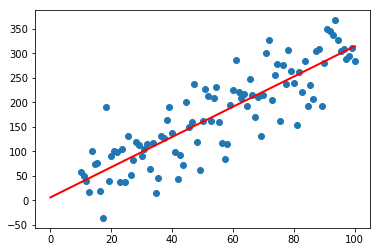

In [186]:
plt.scatter(x,y)
plt.plot(xfit1,yfit1,'r',linewidth = 2)

In [193]:
a = np.linspace(1,100,10000)
b = np.transpose(a[:,np.newaxis])
a = a[:,np.newaxis]

In [194]:
a.shape

(10000, 1)

In [195]:
b.shape

(1, 10000)

In [196]:
a_dot_b = np.dot(a,b)

In [197]:
a_dot_b.shape

(10000, 10000)

In [199]:
test = np.linalg.inv(a_dot_b)
#the determinant has become zero

LinAlgError: Singular matrix